## Д/з

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов соседей по любому из показанных на уроке принципов.
2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

In [4]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [7]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
        #distance += np.abs(x1[i] - x2[i])
    
    return np.sqrt(distance)
    #return (distance)

Реализуем алгоритм поиска k ближайших соседей.

In [11]:
def knn(x_train, y_train, x_test, k):
    q=0.5 #параметр для введения механизма весов
    answers = []
    for x in x_test:
        test_distances = []
        #print(len(answers))    
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            #classes[d[1]] += 1
            classes[d[1]] += q**d[0]
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [12]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [13]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


Построим график распределения классов.

In [14]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .2

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [15]:
X_train.shape

(120, 2)

<ipython-input-14-71e2796638e4>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


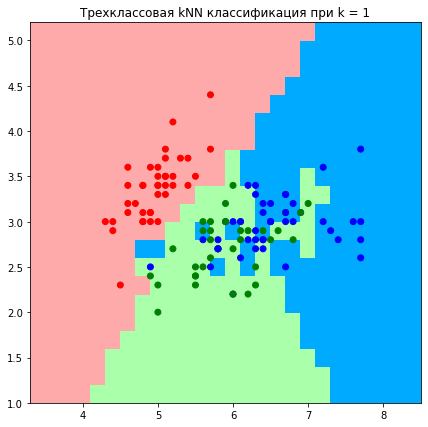

In [16]:
get_graph(X_train, y_train, k)

In [17]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


<ipython-input-14-71e2796638e4>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


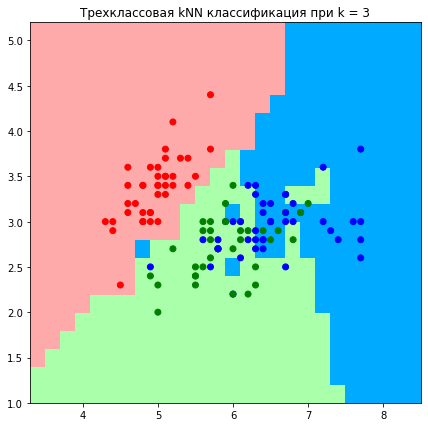

CPU times: user 1.43 s, sys: 25.8 ms, total: 1.46 s
Wall time: 1.46 s


In [18]:
%%time
get_graph(X_train, y_train, k)

In [19]:
%%time
k = 6

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 6: 0.867
CPU times: user 84 ms, sys: 2.77 ms, total: 86.8 ms
Wall time: 86.2 ms


<ipython-input-14-71e2796638e4>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


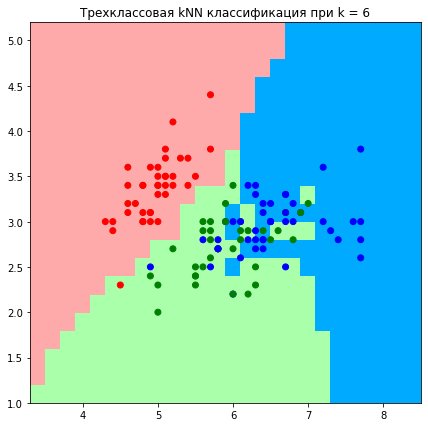

CPU times: user 1.37 s, sys: 28 ms, total: 1.39 s
Wall time: 1.4 s


In [20]:
%%time
get_graph(X_train, y_train, k)

In [21]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.867


<ipython-input-14-71e2796638e4>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


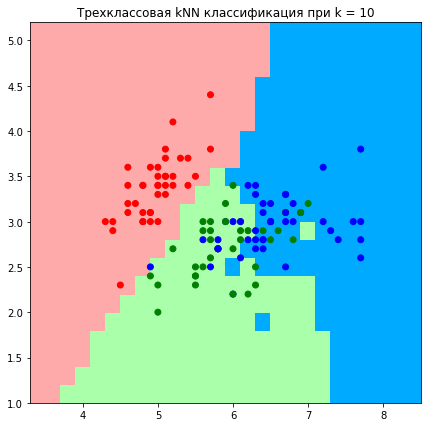

CPU times: user 1.48 s, sys: 29.7 ms, total: 1.51 s
Wall time: 1.52 s


In [22]:
%%time
get_graph(X_train, y_train, k)

#### KMEANS

In [20]:
# максимальное внутрикластерное расстояние
def in_claster(X,p):
    d = 0
    for i in range(X.shape[0]-1):
        for j in range(i+1,X.shape[0]-1):
            r = dist_mincovski(X[i,:],X[j,:],p)
            if r>d:
                d = r
    return d            

# минимальное межкластерное расстояние
def out_claster(X1,X2,p):
    d = np.inf
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            r = dist_mincovski(X1[i,:],X2[j,:],p)
            if r<d:
                d = r
    return d         

Оценим расстояния между группами для набора примеров из ирисов Фишера (2 координаты):

### Алгоритм K-means (K-средних)

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [93]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=800, centers = 5, random_state=1)
X[:,1] *= 1

Изобразим точки на графике.

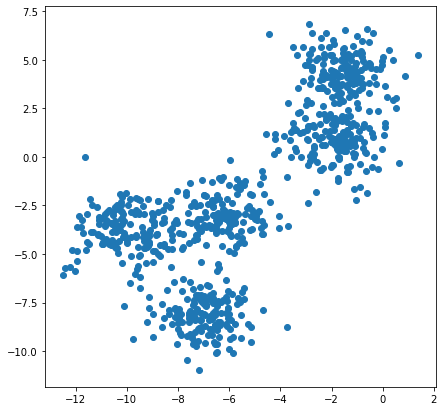

In [94]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [95]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [96]:
def kmeans_predict(centroids, data):    
    # инициализируем центроиды как первые k элементов датасета
    classes = [i for i in range(len(centroids))]
    label = []
    # классифицируем объекты по центроидам
    for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            #print(classification)
            label.append(classification)
    return label

In [97]:
#процедура, подсчитывающее среднее квадратичное внутриклассовое расстояние
def metric_mean_squared_distances(centroids, classes):
    mean_squared_distances = 0
    for current_class in classes:
        sum = 0
        points = classes.get(current_class)
        for i in range(len(points)):           
            distance = e_metrics(points[i], centroids[current_class])
            sum = sum + distance**2
        mean_squared_distances = mean_squared_distances+sum
    return  mean_squared_distances/len(classes)   

Напишем функцию для визуализации кластеров

In [98]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b','m','y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
    plt.grid(True)        
    plt.show()

In [99]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
#k = 3

Теперь посмотрим то, как будет меняться среднее квадратичное внутриклассовое расстояние при числе кластеров от 1 до 10

In [100]:
k_max = 10
mean_distances= []
for k in range(1,k_max+1):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    current_mean_dist = metric_mean_squared_distances(centroids, clusters)
    mean_distances.append([k,current_mean_dist])
    

In [101]:
mean_distances

[[1, 24569.326412799743],
 [2, 3190.521853258327],
 [3, 1735.4767488338705],
 [4, 758.2475217048817],
 [5, 513.2285882569665],
 [6, 239.16287492082324],
 [7, 194.06289680672464],
 [8, 159.62238211273825],
 [9, 130.55189522442515],
 [10, 114.31875280128672]]

Построим график:

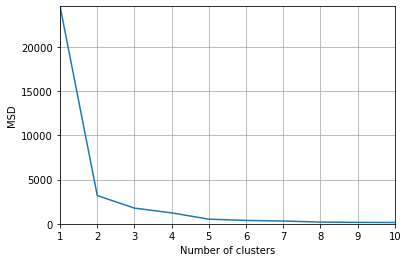

In [92]:
plt.xlabel('Number of clusters')
plt.ylabel('MSD')
plt.xlim(1, mean_distances[-1][0])
plt.ylim(0, mean_distances[0][1])
plt.grid(True)
dist_list = [d[1] for d in mean_distances]
k = [d[0] for d in mean_distances]
plt.plot(k,dist_list)
plt.show()